In [33]:
import import_ipynb
import numpy as np
import networkx as nx

import netsci.visualization as nsv
import netsci.metrics.motifs as nsm
import itertools

import graph_functions as gf
import generate_null_models as gn
import motif_analysis as motif

# Basic Network Statistics

In [2]:
directed = nx.read_gml('directed.gml')

In [3]:
gf.print_statistics(directed)

Number of nodes:  2139
Number of edges:  6019

Average degree:  5.627863487611033
Average degree (alternate calculation) 5.627863487611033

Minimum degree:  1
Maximum degree:  36
Average Clustering Coefficient:  0.033024296572043026


### Connected Components

In [4]:
# Number of connected components
connected_components = gf.get_size_of__each_connected_components(directed)
print("The number of connected components in our graph is", len(connected_components))
print("With the largest connected component having a total of", connected_components[0], "nodes")

The number of connected components in our graph is 25
With the largest connected component having a total of 1909 nodes


### Degree Distribution(s)

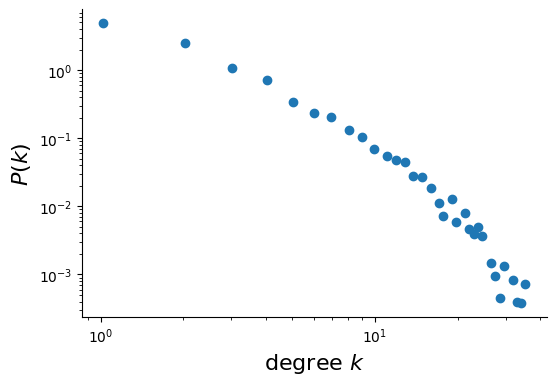

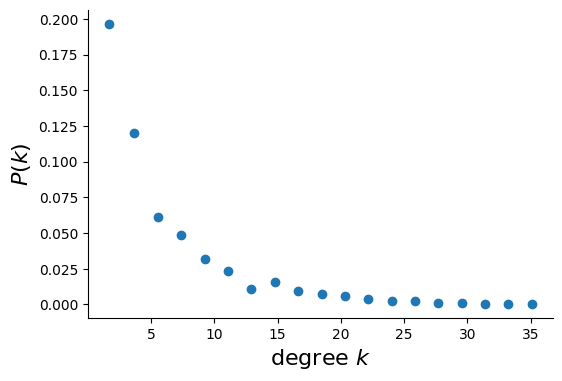

In [5]:
# Degree Distribution logarithmic and linear
gf.plot_degree_dist(directed, 100)
gf.plot_degree_dist_lin(directed, 20)

### Path Length and Clustering Coefficient
Since our graph contains 25 connected components, we cannot determine the average path lenght of the original graph. To calculate this, we will determin the average path lenght of the two largest connected components; the mens and womens division

In [6]:
mens_division_directed = gf.get_largest_subgraph(directed)
womens_division_directed = gf.get_second_largest_subgraph(directed)

In [7]:
# Basic statistics of the mens division
gf.print_statistics(mens_division_directed)

Number of nodes:  1909
Number of edges:  5521

Average degree:  5.784180199057098
Average degree (alternate calculation) 5.784180199057098

Minimum degree:  1
Maximum degree:  36
Average Clustering Coefficient:  0.03138819213299309
Average Shortest Path:  3.4736795143384587


In [8]:
# Basic statistics of the womens division
gf.print_statistics(womens_division_directed)

Number of nodes:  181
Number of edges:  471

Average degree:  5.204419889502763
Average degree (alternate calculation) 5.204419889502763

Minimum degree:  1
Maximum degree:  18
Average Clustering Coefficient:  0.059220505998432156
Average Shortest Path:  2.302793124616329


## Null Model Compariosn - Basic Network Statistics

In [25]:
# Null model comparison of ERs to entire network
avgkER, cER, sER = gn.generate_N_erdos_renyi(directed, True, 1000)

In [26]:
print("ER null model comparison")
avgkERmean = np.mean(avgkER)
avgkERstd = np.std(avgkER)
print("Average Degree Mean:", avgkERmean, "Standard Deviation:", avgkERstd)

cERmean = np.mean(cER)
cERstd = np.std(cER)
print("Correlation Coefficient Mean:", cERmean, "Standard Deviation:", cERstd)

sERmean = np.mean(sER)
sERstd = np.std(sER)
print("Path Length Mean:", sERmean, "Standard Deviation:", sERstd)

ER null model comparison
Average Degree Mean: 11.2597587657784 Standard Deviation: 0.0987160441998444
Correlation Coefficient Mean: 0.0026226950821891196 Standard Deviation: 0.00019164973389333234
Path Length Mean: 4.595927103939084 Standard Deviation: 0.02283622604177989


In [24]:
# Null model comparison of DPs to entire network
avgkDP, cDP, sDP = gn.generate_N_degree_preserving(directed, True, 1000)

In [22]:
print("Degree Preserving null model comparison")
avgkDPmean = np.mean(avgkDP)
avgkDPstd = np.std(avgkDP)
print("Average Degree Mean:", avgkDPmean, "Standard Deviation:", avgkDPstd)

cDPmean = np.mean(cDP)
cDPstd = np.std(cDP)
print("Correlation Coefficient Mean:", cDPmean, "Standard Deviation:", cDPstd)

sDPmean = np.mean(sDP)
sDPstd = np.std(sDP)
print("Path Length Mean:", sDPmean, "Standard Deviation:", sDPstd)

Degree Preserving null model comparison
Average Degree Mean: 5.627863487611032 Standard Deviation: 8.881784197001252e-16
Correlation Coefficient Mean: 0.005199528372821304 Standard Deviation: 0.0007046199405524387
Path Length Mean: nan Standard Deviation: nan


/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/ammanyusuf/Documents/UofC/CPSC572/project/code/env/lib/python3.10/site-packages/numpy/core/_methods.py:257: Ru

# Research Question 1 - Centrality Measures
what classification can we use to determine if a fighter is important in our netwrok? What are our important fighters?

In [30]:
N = 10

degreeCentrality = gf.degree_centrality(directed)
inDegreeCentrality = gf.in_degree_centrality(directed)
outDegreeCentrality = gf.out_degree_centrality(directed)
betweennessCentrality = gf.betweenness_centrality(directed)
edgeBetweennessCentrality = gf.edge_betweenness_centrality(directed)
closenessCentrality = gf.closeness_centrality(directed)
eigenvectorCentrality = gf.eigenvector_centrality(directed)

print("Top 10 Highest Degree Centralities: " + str(dict(itertools.islice(degreeCentrality.items(), N))) + "\n")
print("Top 10 Highest InDegree Centralities: " + str(dict(itertools.islice(inDegreeCentrality.items(), N))) + "\n")
print("Top 10 Highest OutDegree Centralities: " + str(dict(itertools.islice(outDegreeCentrality.items(), N))) + "\n")
print("Top 10 Highest Between Centralities: " + str(dict(itertools.islice(betweennessCentrality.items(), N))) + "\n")
print("Top 10 Highest Edge Centralities: " + str(dict(itertools.islice(edgeBetweennessCentrality.items(), N))) + "\n")
print("Top 10 Highest Closeness Centralities: " + str(dict(itertools.islice(closenessCentrality.items(), N))) + "\n")
print("Top 10 Highest Eigenvector Centralities: " + str(dict(itertools.islice(eigenvectorCentrality.items(), N))) + "\n")
print("THE END")

Top 10 Highest Degree Centralities: {'Jim Miller': 0.01683816651075772, 'Donald Cerrone': 0.01637043966323667, 'Andrei Arlovski': 0.015902712815715623, 'Jeremy Stephens': 0.015434985968194575, 'Diego Sanchez': 0.014967259120673527, 'Demian Maia': 0.014967259120673527, 'Clay Guida': 0.01403180542563143, 'Rafael Dos Anjos': 0.013564078578110384, 'Michael Bisping': 0.013564078578110384, 'Gleison Tibau': 0.013096351730589336}

Top 10 Highest InDegree Centralities: {'Donald Cerrone': 0.011225444340505146, 'Demian Maia': 0.01028999064546305, 'Jim Miller': 0.009822263797942002, 'Andrei Arlovski': 0.009354536950420954, 'Michael Bisping': 0.009354536950420954, 'Diego Sanchez': 0.008886810102899906, 'Jon Jones': 0.008886810102899906, 'Dustin Poirier': 0.00841908325537886, 'Rafael Dos Anjos': 0.00841908325537886, 'Max Holloway': 0.007951356407857811}

Top 10 Highest OutDegree Centralities: {'Jeremy Stephens': 0.007951356407857811, 'Jim Miller': 0.007015902712815715, 'Andrei Arlovski': 0.006548175

# Research Question 2 - Community Detection
What communities can we find in our graph?

# Research Question 3 - Motifs
Is there a special type of relationship between fighters at the mesoscopic level that is more prevalant in our graph? A sort of 'dog eat dog' relationship where a single fighter outclasses two other fighers consistently?

In [34]:
motif_frquency = motif.generate_3_struct_motifs(directed)

NameError: name 'nsm' is not defined

In [ ]:
nsv.bar_motifs(motif_frquency)

## Null Model Comparison to Motifs
To see if our results from the motifs is statistically significant, we will compare it to two random model generations

In [ ]:
motif_frquency_DP = motif.generate_N_DP_graphs_motifs(directed, True, 1000)

In [ ]:
motif_frquency_ER = motif.generate_N_ER_graphs_motifs(directed, True, 1000)